In [1]:
# Import of relevant packages
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import airportsdata
# installing airport data package
#!pip install -U airportsdata
import datetime 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# introducing each dataset 
d_test='data/Test.csv'
d_sample='data/SampleSubmission.csv'
d_train='data/Train.csv'

In [3]:
df_test=pd.read_csv(d_test)
df_test.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
5,test_id_5,2016-05-11,UG 1313,CDG,SFA,2016-05-11 11:10:00,2016-05-11 12.40.00,DEP,TU CR9ISA
6,test_id_6,2016-05-11,TU 0515,BCN,TUN,2016-05-11 10:40:00,2016-05-11 12.15.00,ATA,TU 32AIMF
7,test_id_7,2016-05-11,TU 0712,CMN,TUN,2016-05-11 10:35:00,2016-05-11 13.00.00,ATA,TU 32AIMN
8,test_id_8,2016-05-11,TU 0751,LYS,TUN,2016-05-11 10:40:00,2016-05-11 12.35.00,ATA,TU 320IMS
9,test_id_9,2016-05-11,TU 0745,FRA,TUN,2016-05-11 10:30:00,2016-05-11 12.55.00,ATA,TU 32AIMC


In [4]:
df_sample=pd.read_csv(d_sample)
df_sample.head(2)

,ID,target
0,test_id_0,2470
1,test_id_1,2944


In [5]:
df_train=pd.read_csv(d_train)
df_train.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0


Variable definitions

* DATOP - Date of flight
* FLTID - Flight number
* DEPSTN - Departure point
* ARRSTN - Arrival point
* STD - Scheduled Time departure
* STA - Scheduled Time arrival
* STATUS - Flight status
* ETD - Expected Time departure
* ETA - Expected Time arrival
* ATD - Actual Time of Departure
* ATA - Actual Time of arrival
* DELAY1 - Delay code 1
* DUR1 - delay time 1
* DELAY2 - Delay code 2
* DUR2 - delay time 2
* DELAY3 - Delay code 3
* DUR3 - delay time 3
* DELAY4 - Delay code 4
* DUR4 - delay time 4
* AC - Aircraft Code

# Data Cleaning and Feature Engineering

### Data Cleaning

In [6]:
df_train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [7]:
df=df_train.copy()

In [8]:
df.shape

(107833, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [10]:
df.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


#### Renaming Columns

In [11]:
# convert column names to lower case and omit the space before or between or after column names
df.columns= df.columns.str.lower().str.strip()
df.columns

Index(['id', 'datop', 'fltid', 'depstn', 'arrstn', 'std', 'sta', 'status',
       'ac', 'target'],
      dtype='object')

#### Finding more about the data types of columns

In [12]:
# finding the data types of each column
df.dtypes

id         object
datop      object
fltid      object
depstn     object
arrstn     object
std        object
sta        object
status     object
ac         object
target    float64
dtype: object

In [13]:
# Number of Unique Variable 
df.nunique()

id        107833
datop       1011
fltid       1861
depstn       132
arrstn       128
std        81697
sta        85136
status         5
ac            68
target       968
dtype: int64

In [14]:
# find the categories of the categorical feature 'status'
df.status.unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

* ATA	Actual Time Of Arrival	
* DEP	Depart or Departure 
* RTR   Return to Ramp
* SCH   Scheduled change 
* DEL   


In [15]:
df.status.value_counts()

ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: status, dtype: int64

In [16]:
# change "datop" dtype to datetime with format %Y/%m/%d
df['datop'] = pd.to_datetime(df['datop'], format='%Y/%m/%d')

In [17]:
# change "std" dtype to datetime with format %Y/%m/%d
df['std'] = pd.to_datetime(df['std'], format='%Y/%m/%d %H:%M:%S')

In [18]:
# change "sta" format for example from  12.55.00 to 12:55:00
df['sta']=df['sta'].apply(lambda x: x.replace(".",":"))

In [19]:
# change "sta" dtype to datetime with format %Y/%m/%d
df['sta'] = pd.to_datetime(df['sta'], format='%Y/%m/%d %H:%M:%S')

In [20]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0


In [21]:
df[(df.status == 'ATA') & (df.target > 0)].describe()

,target
count,69211.000000
mean,75.330713
std,138.141402
min,1.000000
25%,15.000000
50%,30.000000
75%,74.000000
max,3451.000000


Because Status Value related to the Traget make no Sense, we decided to drope the satus Column 

In [22]:
df.drop(columns='status', inplace = True)

In [23]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,TU 320IMU,22.0


In [24]:
### Checking Datatypes of columns 

In [25]:
#df=df.astype({'fltid' :'string'} )
#df=df.astype({'depstn' :'string'}) 
#df=df.astype({'arrstn' : 'string'})
#df=df.astype({'ac' :'string'})

In [26]:
#df.dtypes

In [27]:
# Replacing Categorical to Numerical 
# Label encoder function On Embarked
#encoder = LabelEncoder()
#df.status =encoder.fit_transform(df.status)

In [28]:
# knowing how many status are 'ATA' and also having more than 0 minute delay in target . 
#df[(df.status =='ATA') & (df.target != 0.0)]

### Checking for Duplicates

In [29]:
df_copy = df.copy()

In [30]:
# drop some Colum to analyse the Duplication
df_copy.drop(columns= ['id','target'], inplace=True )

In [31]:
df_copy.duplicated().sum()

5

In [32]:
df_copy[df_copy.duplicated()]

,datop,fltid,depstn,arrstn,std,sta,ac
23335,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,TU 736IOR
24606,2016-10-13,TU 0752,TUN,TUN,2016-10-13 08:00:00,2016-10-13 09:20:00,TU 31BIMO
26716,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,TU 736IOR
41876,2017-05-27,TU 0440,MIR,MIR,2017-05-27 11:50:00,2017-05-27 14:15:00,TU 320IMS
57786,2017-09-01,TU 0752,TUN,TUN,2017-09-01 08:20:00,2017-09-01 09:45:00,TU 320IMV


### now we check all these 5 duplicated and drop the duplicated ones with less delays 

In [33]:
# First Duplication --> different Target so we will keep it 
df[(df.datop == '2016-10-13') & (df.depstn == 'LYS') & (df.arrstn == 'LYS')]

,id,datop,fltid,depstn,arrstn,std,sta,ac,target
21099,train_id_21099,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,TU 736IOR,35.0
23335,train_id_23335,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,TU 736IOR,1831.0
26716,train_id_26716,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,TU 736IOR,235.0


In [34]:
# dropping the 2 least minute target delay rows from the duplications
#df=df.drop(index=[21099 , 26716])

In [35]:
# Second Duplication --> different Target so we will keep it 
df[(df.datop == '2016-10-13') & (df.depstn == 'TUN') & (df.arrstn == 'TUN') &(df.ac == 'TU 31BIMO')]

,id,datop,fltid,depstn,arrstn,std,sta,ac,target
23614,train_id_23614,2016-10-13,TU 0752,TUN,TUN,2016-10-13 08:00:00,2016-10-13 09:20:00,TU 31BIMO,0.0
24606,train_id_24606,2016-10-13,TU 0752,TUN,TUN,2016-10-13 08:00:00,2016-10-13 09:20:00,TU 31BIMO,42.0


In [36]:
# Third Duplication --> different Target so we will keep it 
df[(df.datop == '2017-05-27') & (df.depstn == 'MIR')& (df.arrstn == 'MIR') & (df.fltid == 'TU 0440 ')]

,id,datop,fltid,depstn,arrstn,std,sta,ac,target
39467,train_id_39467,2017-05-27,TU 0440,MIR,MIR,2017-05-27 11:50:00,2017-05-27 14:15:00,TU 320IMS,113.0
41876,train_id_41876,2017-05-27,TU 0440,MIR,MIR,2017-05-27 11:50:00,2017-05-27 14:15:00,TU 320IMS,48.0


In [37]:
# forth Duplicate --> different Target so we will keep it 
df[(df.datop == '2017-09-01') & (df.depstn == 'TUN')& (df.arrstn == 'TUN') & (df.fltid == 'TU 0752 ')]

,id,datop,fltid,depstn,arrstn,std,sta,ac,target
54682,train_id_54682,2017-09-01,TU 0752,TUN,TUN,2017-09-01 08:20:00,2017-09-01 09:45:00,TU 320IMV,148.0
57786,train_id_57786,2017-09-01,TU 0752,TUN,TUN,2017-09-01 08:20:00,2017-09-01 09:45:00,TU 320IMV,30.0


In [38]:
# No Duplication
df[df.duplicated()]

,id,datop,fltid,depstn,arrstn,std,sta,ac,target


In [39]:
df.duplicated().sum()

0

### Some Investigation

In [40]:
# Flights that starts from RTM have the Biggest delay 
df.groupby(['depstn']).describe().sort_values(by=('target', 'mean'), ascending=False).head(10)

target                                                              
        count        mean         std    min     25%    50%     75%     max
depstn                                                                     
RTM       7.0  505.571429  290.769586  198.0  288.50  329.0  792.50   850.0
KBP       1.0  341.000000         NaN  341.0  341.00  341.0  341.00   341.0
VOG       2.0  328.000000    8.485281  322.0  325.00  328.0  331.00   334.0
BDS       1.0  202.000000         NaN  202.0  202.00  202.0  202.00   202.0
AYT      24.0  159.500000  172.832918    5.0   47.75  129.5  209.50   853.0
HAJ      23.0  157.869565  336.309828    0.0   26.00   59.0  144.50  1633.0
AAE       1.0  157.000000         NaN  157.0  157.00  157.0  157.00   157.0
IEV       4.0  152.250000  304.500000    0.0    0.00    0.0  152.25   609.0
CGN      14.0  138.000000  225.241067    0.0   15.75   27.5   97.25   665.0
VKO      63.0  134.492063  381.676221    0.0    0.00    8.0  125.00  2415.0

In [41]:
# Flights that arrive from RTM have the Biggest delay 
df.groupby(['arrstn']).describe().sort_values(by=('target', 'mean'), ascending=False).head(10)

target                                                             
        count        mean         std    min    25%    50%     75%     max
arrstn                                                                    
RTM       7.0  389.285714  367.145618   25.0  107.5  150.0  747.00   841.0
TMR       1.0  382.000000         NaN  382.0  382.0  382.0  382.00   382.0
ESB       1.0  355.000000         NaN  355.0  355.0  355.0  355.00   355.0
VOG       2.0  178.000000  103.237590  105.0  141.5  178.0  214.50   251.0
RAK       1.0  140.000000         NaN  140.0  140.0  140.0  140.00   140.0
AYT      24.0  137.666667  162.526430    0.0   45.0  116.5  158.75   798.0
GHA       1.0  130.000000         NaN  130.0  130.0  130.0  130.00   130.0
LIL      30.0  112.800000  201.366778    0.0    0.0   22.5  117.50   915.0
NKC     291.0   95.457045  131.462991    0.0   20.0   55.0  136.00  1245.0
VKO      63.0   90.920635  238.353039    0.0    0.0    6.0  106.00  1553.0

In [42]:
#
df.sort_values(by='target', ascending=False)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target
48878,train_id_48878,2017-09-30,TU 0875,GVA,DJE,2017-09-30 09:25:00,2017-09-30 11:45:00,TU 32AIMM,3451.0
99731,train_id_99731,2018-12-27,TU 0399,ABJ,TUN,2018-12-27 22:40:00,2018-12-28 03:50:00,TU 320IMU,3317.0
77495,train_id_77495,2018-05-13,TU 2588,DJE,LYS,2018-05-13 12:00:00,2018-05-13 14:20:00,TU 32AIML,3245.0
59199,train_id_59199,2017-08-31,TU 2771,CDG,TUN,2017-08-31 10:15:00,2017-08-31 12:45:00,TU 32AIMM,3025.0
10123,train_id_10123,2016-03-20,TU 0209,NTE,TUN,2016-03-20 10:30:00,2016-03-20 12:50:00,TU 736IOQ,2980.0
...,...,...,...,...,...,...,...,...,...
67021,train_id_67021,2017-07-21,UG 0002,TUN,DJE,2017-07-21 06:00:00,2017-07-21 07:00:00,TU CR9ISA,0.0
67022,train_id_67022,2017-08-29,UG 0020,TUN,SFA,2017-08-29 06:30:00,2017-08-29 07:15:00,TU CR9ISA,0.0
67023,train_id_67023,2017-12-13,TU 5000,TUN,TUN,2017-12-13 08:00:00,2017-12-13 10:00:00,TU 332IFM,0.0
67024,train_id_67024,2017-08-25,UG 0002,TUN,DJE,2017-08-25 06:00:00,2017-08-25 07:00:00,TU CR9ISA,0.0


In [43]:
df.groupby(['arrstn']).describe()

target                                                            
         count        mean         std    min    25%    50%    75%     max
arrstn                                                                    
AAE        1.0   28.000000         NaN   28.0   28.0   28.0   28.0    28.0
ABJ      823.0   50.191981   93.880753    0.0   10.0   29.0   53.0  1982.0
ADB        1.0   45.000000         NaN   45.0   45.0   45.0   45.0    45.0
AHU       50.0   48.140000  116.541665    0.0    0.0   10.5   28.0   618.0
ALG     1573.0   70.114431  115.537805    0.0   10.0   27.0   69.0  1051.0
...        ...         ...         ...    ...    ...    ...    ...     ...
VNO        6.0    0.000000    0.000000    0.0    0.0    0.0    0.0     0.0
VOG        2.0  178.000000  103.237590  105.0  141.5  178.0  214.5   251.0
VRN       27.0   48.148148  100.394493    0.0    0.0   13.0   25.0   426.0
YUL      243.0   38.164609   54.909821    0.0   12.0   23.0   39.0   406.0
ZRH      372.0   39.583333  136.775697    0.0    0.0   10.0   29.0  1934.0

[128 rows x 8 columns]

In [44]:
# airport data information 
airports = airportsdata.load('IATA')  # key is the IATA location code
print(airports['TUN'])

{'icao': 'DTTA', 'iata': 'TUN', 'name': 'Tunis Carthage International Airport', 'city': 'Tunis', 'subd': 'Tunis', 'country': 'TN', 'elevation': 22.0, 'lat': 36.8510017395, 'lon': 10.2271995544, 'tz': 'Africa/Tunis', 'lid': ''}


In [45]:
airports['TUN']['lat']

36.8510017395

In [46]:
df.head(10)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,TU 320IMU,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18:15:00,TU 736IOP,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09:00:00,TU 32AIMH,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09:55:00,TU 32AIMI,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09:00:00,TU 32AIMC,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09:15:00,TU 31AIMK,21.0


In [47]:
#df[(df.fltid == 'TU 0716 ')&(df.status =='RTR')][['datop','depstn','arrstn','fltid','std','sta','status','ac','target']].sort_values(by='std', ascending=True).head(40)

In [48]:
# invistigation the SXF Airoport
df[df.arrstn=='SXF']

,id,datop,fltid,depstn,arrstn,std,sta,ac,target
308,train_id_308,2016-04-30,TU 6592,NBE,SXF,2016-04-30 11:25:00,2016-04-30 14:20:00,TU 736IOK,117.0
342,train_id_342,2016-01-16,TU 6592,NBE,SXF,2016-01-16 15:35:00,2016-01-16 18:30:00,TU 32AIMD,0.0
438,train_id_438,2016-08-05,TU 6548,HAM,SXF,2016-08-05 10:15:00,2016-08-05 11:05:00,TU 32AIMD,55.0
939,train_id_939,2016-06-04,TU 6592,NBE,SXF,2016-06-04 11:25:00,2016-06-04 14:20:00,TU 736IOK,27.0
1192,train_id_1192,2016-04-23,TU 6592,NBE,SXF,2016-04-23 11:25:00,2016-04-23 14:20:00,TU 31AIMJ,50.0
...,...,...,...,...,...,...,...,...,...
101465,train_id_101465,2018-10-21,TU 6592,MIR,SXF,2018-10-21 12:50:00,2018-10-21 15:50:00,TU 736IOR,0.0
102344,train_id_102344,2018-12-02,TU 6594,MIR,SXF,2018-12-02 05:50:00,2018-12-02 08:50:00,TU 736IOQ,6.0
102617,train_id_102617,2018-11-18,TU 6594,MIR,SXF,2018-11-18 05:50:00,2018-11-18 08:50:00,TU 736IOK,8.0
102782,train_id_102782,2018-12-23,TU 6594,MIR,SXF,2018-12-23 05:50:00,2018-12-23 08:50:00,TU 736IOR,6.0


In [49]:
# because SXF is old name of berlin airport and now it is BER we have to change all SXF in data set to BER
df['arrstn']=df['arrstn'].apply(lambda x: x.replace ('SXF','BER'))

In [50]:
# because SXF is old name of berlin airport and now it is BER we have to change all SXF in data set to BER
df['depstn']=df['depstn'].apply(lambda x: x.replace ('SXF','BER'))

In [51]:
# we made a new column as 'lat_arr' for the latitude of arrival destination ('arrstn')
df['lat_arr']=df['arrstn'].apply(lambda x: airports[x]['lat'])
# we made a new column as 'lon_arr' for the longitude of arrival destination ('arrstn')
df['lon_arr']=df['arrstn'].apply(lambda x: airports[x]['lon'])


In [52]:
# we made a new column as 'lat_dep' for the latitude of departure destination ('dpstn')
df['lat_dep']=df['depstn'].apply(lambda x: airports[x]['lat'])
# we made a new column as 'lon_dep' for the longitude of departure destination ('dpstn')
df['lon_dep']=df['depstn'].apply(lambda x: airports[x]['lon'])

In [53]:
def make_season(x):
    if  x =="03" or x =="04" or  x =="05":
        return "Spring"
    elif x =="06" or x =="07" or  x =="08":
        return "Summer"
    elif x =="09" or x =="10" or  x =="11":
        return "Autumn"
    else :
        return "Winter"

In [54]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target,lat_arr,lon_arr,lat_dep,lon_dep
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,36.851002,10.2272,33.3675,-7.58997


In [55]:
df['year'] = pd.DatetimeIndex(df['datop']).year
df['month'] = df['datop'].dt.strftime('%m')
df['Season'] =  df.month.apply(lambda x: make_season(x))
df['weekday'] = pd.DatetimeIndex(df['datop']).weekday
df['hour'] = pd.DatetimeIndex(df['datop']).hour

In [56]:
# df['year_sta'] = pd.DatetimeIndex(df['sta']).year
# df['month_sta'] = df['sta'].dt.strftime('%m')
# df['Season_sta'] =  df.month_std.apply(lambda x: make_season(x))
# df['weekday_sta'] = pd.DatetimeIndex(df['sta']).weekday
# df['hour_sta'] = pd.DatetimeIndex(df['sta']).hour

In [57]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target,lat_arr,lon_arr,lat_dep,lon_dep,year,month,Season,weekday,hour
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,36.851002,10.2272,33.3675,-7.58997,2016,01,Winter,6,0


In [58]:
df.target.describe()

count    107833.000000
mean         48.733013
std         117.135562
min           0.000000
25%           0.000000
50%          14.000000
75%          43.000000
max        3451.000000
Name: target, dtype: float64

In [59]:
df_2=df[df.target==0 ]
df_2.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target,lat_arr,lon_arr,lat_dep,lon_dep,year,month,Season,weekday,hour
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,TU 32AIMN,0.0,41.275333,28.752,36.851002,10.2272,2016,01,Winter,5,0


In [60]:
type(df_2.target[2])

numpy.float64

In [61]:
# Trying the One-hot-encoding On Sex
# One_hot = pd.get_dummies(df.status)
# One_hot

# df = df.join(One_hot)
# df.head()

In [62]:
# cor = df[(df.target !=0)].corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
# plt.show()

In [63]:
# cor = df.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
# plt.show()

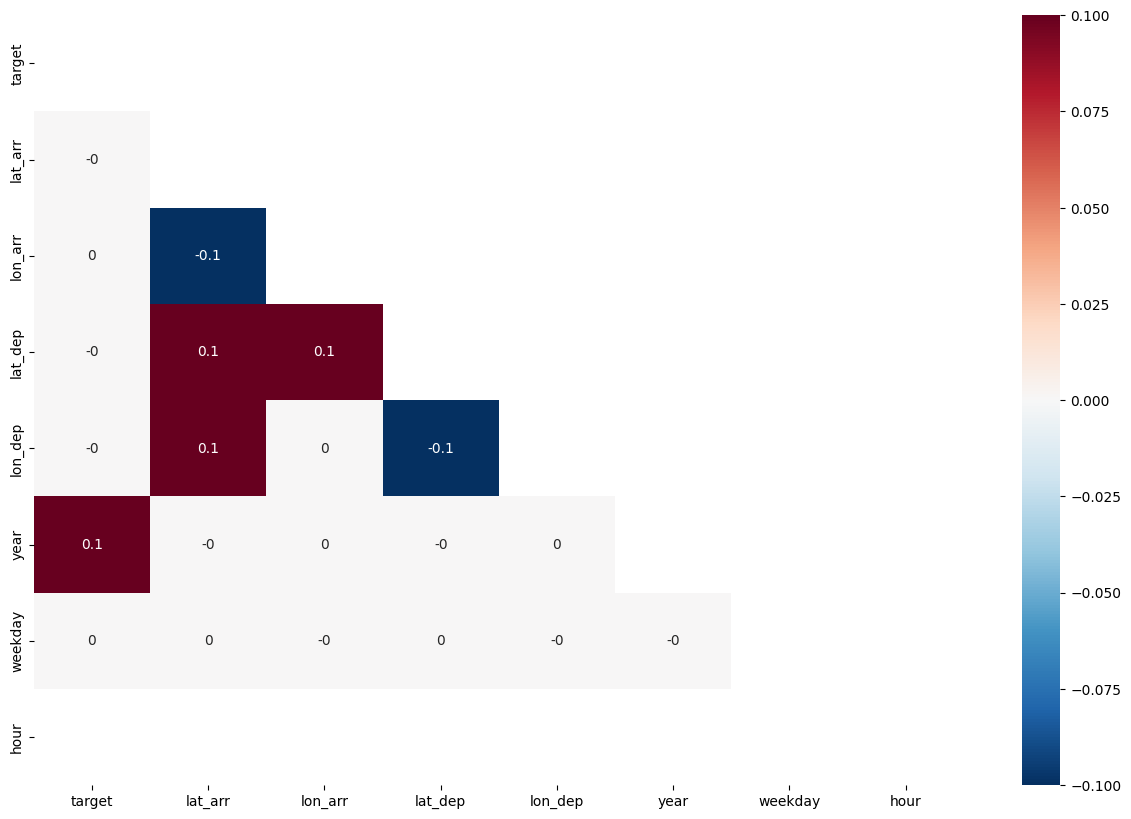

In [64]:
# Plot correlation matrix 
mask = np.triu(df.corr())
plt.figure(figsize = (15,10))
ax = sns.heatmap(round(df.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

In [65]:
df['trajectory'] = df['depstn'] + '-' + df['arrstn']
df['trajectory_duration'] = df['sta'] - df['std']

In [66]:
#df['trajectory_duration'] = pd.DatetimeIndex(df['trajectory_duration']).hour

In [67]:
df.dtypes

id                              object
datop                   datetime64[ns]
fltid                           object
depstn                          object
arrstn                          object
std                     datetime64[ns]
sta                     datetime64[ns]
ac                              object
target                         float64
lat_arr                        float64
lon_arr                        float64
lat_dep                        float64
lon_dep                        float64
year                             int64
month                           object
Season                          object
weekday                          int64
hour                             int64
trajectory                      object
trajectory_duration    timedelta64[ns]
dtype: object

In [68]:
le = LabelEncoder()
# enc = OneHotEncoder(sparse=False)
df['depstn'] = le.fit_transform(df['depstn'])
df['arrstn'] = le.fit_transform(df['arrstn'])
df['ac_cat'] = le.fit_transform(df['ac'])
df['fltid_cat'] = le.fit_transform(df['fltid'])
df['trajectory_cat'] = le.fit_transform(df['trajectory'])

In [69]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target,lat_arr,...,year,month,Season,weekday,hour,trajectory,trajectory_duration,ac_cat,fltid_cat,trajectory_cat
0,train_id_0,2016-01-03,TU 0712,32,119,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,36.851002,...,2016,01,Winter,6,0,CMN-TUN,0 days 02:25:00,46,230,126


### Visualisation

In [70]:
#sns.pairplot(data=df_clean , vars=['id', 'datop', 'fltid', 'depstn', 'arrstn', 'std', 'sta', 'status','ac', 'target'])

In [71]:
# sns.pairplot(data=df , hue='status')

In [72]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target,lat_arr,...,year,month,Season,weekday,hour,trajectory,trajectory_duration,ac_cat,fltid_cat,trajectory_cat
0,train_id_0,2016-01-03,TU 0712,32,119,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,36.851002,...,2016,01,Winter,6,0,CMN-TUN,0 days 02:25:00,46,230,126


In [73]:
df.columns

Index(['id', 'datop', 'fltid', 'depstn', 'arrstn', 'std', 'sta', 'ac',
       'target', 'lat_arr', 'lon_arr', 'lat_dep', 'lon_dep', 'year', 'month',
       'Season', 'weekday', 'hour', 'trajectory', 'trajectory_duration',
       'ac_cat', 'fltid_cat', 'trajectory_cat'],
      dtype='object')

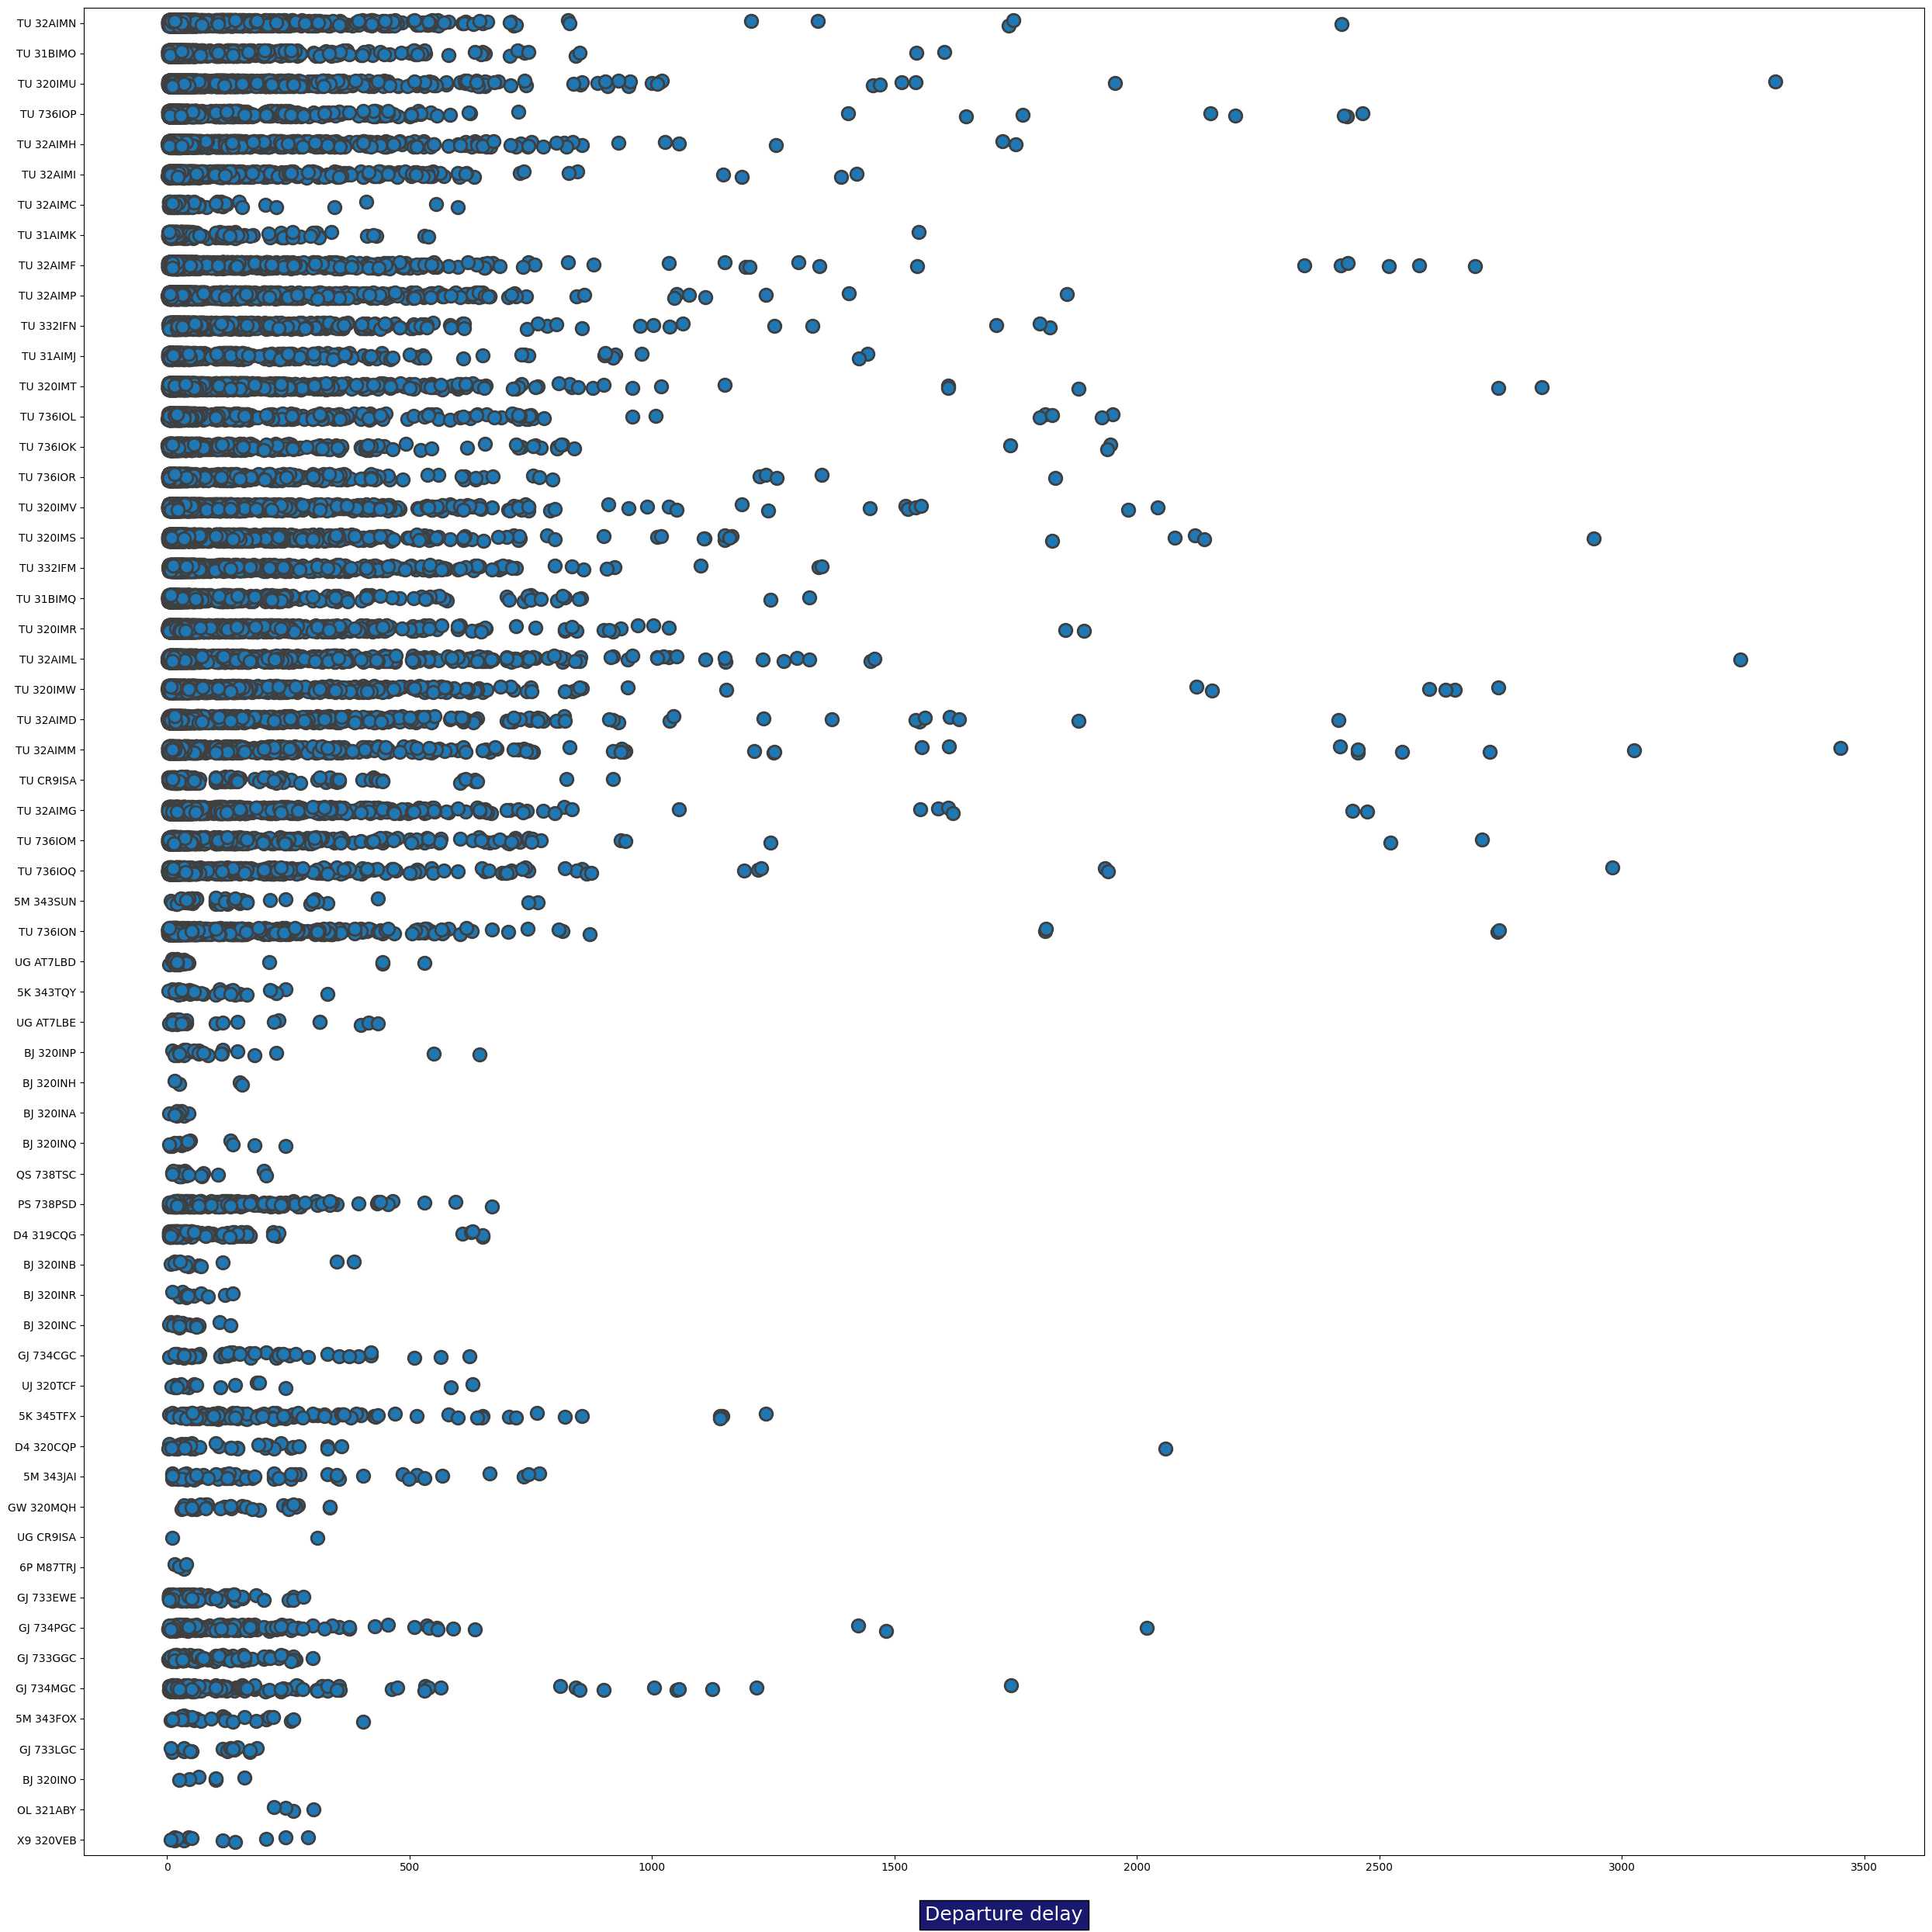

In [74]:
fig = plt.figure(1, figsize=(25,25))
df2 = df.loc[:, ['ac', 'target']]
df2 = df2.drop(df2[df2.target == 0].index)
ax = sns.stripplot(x="target", y="ac", data=df2, size = 12, linewidth = 2,  jitter=True)
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=30)
ax.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3) 

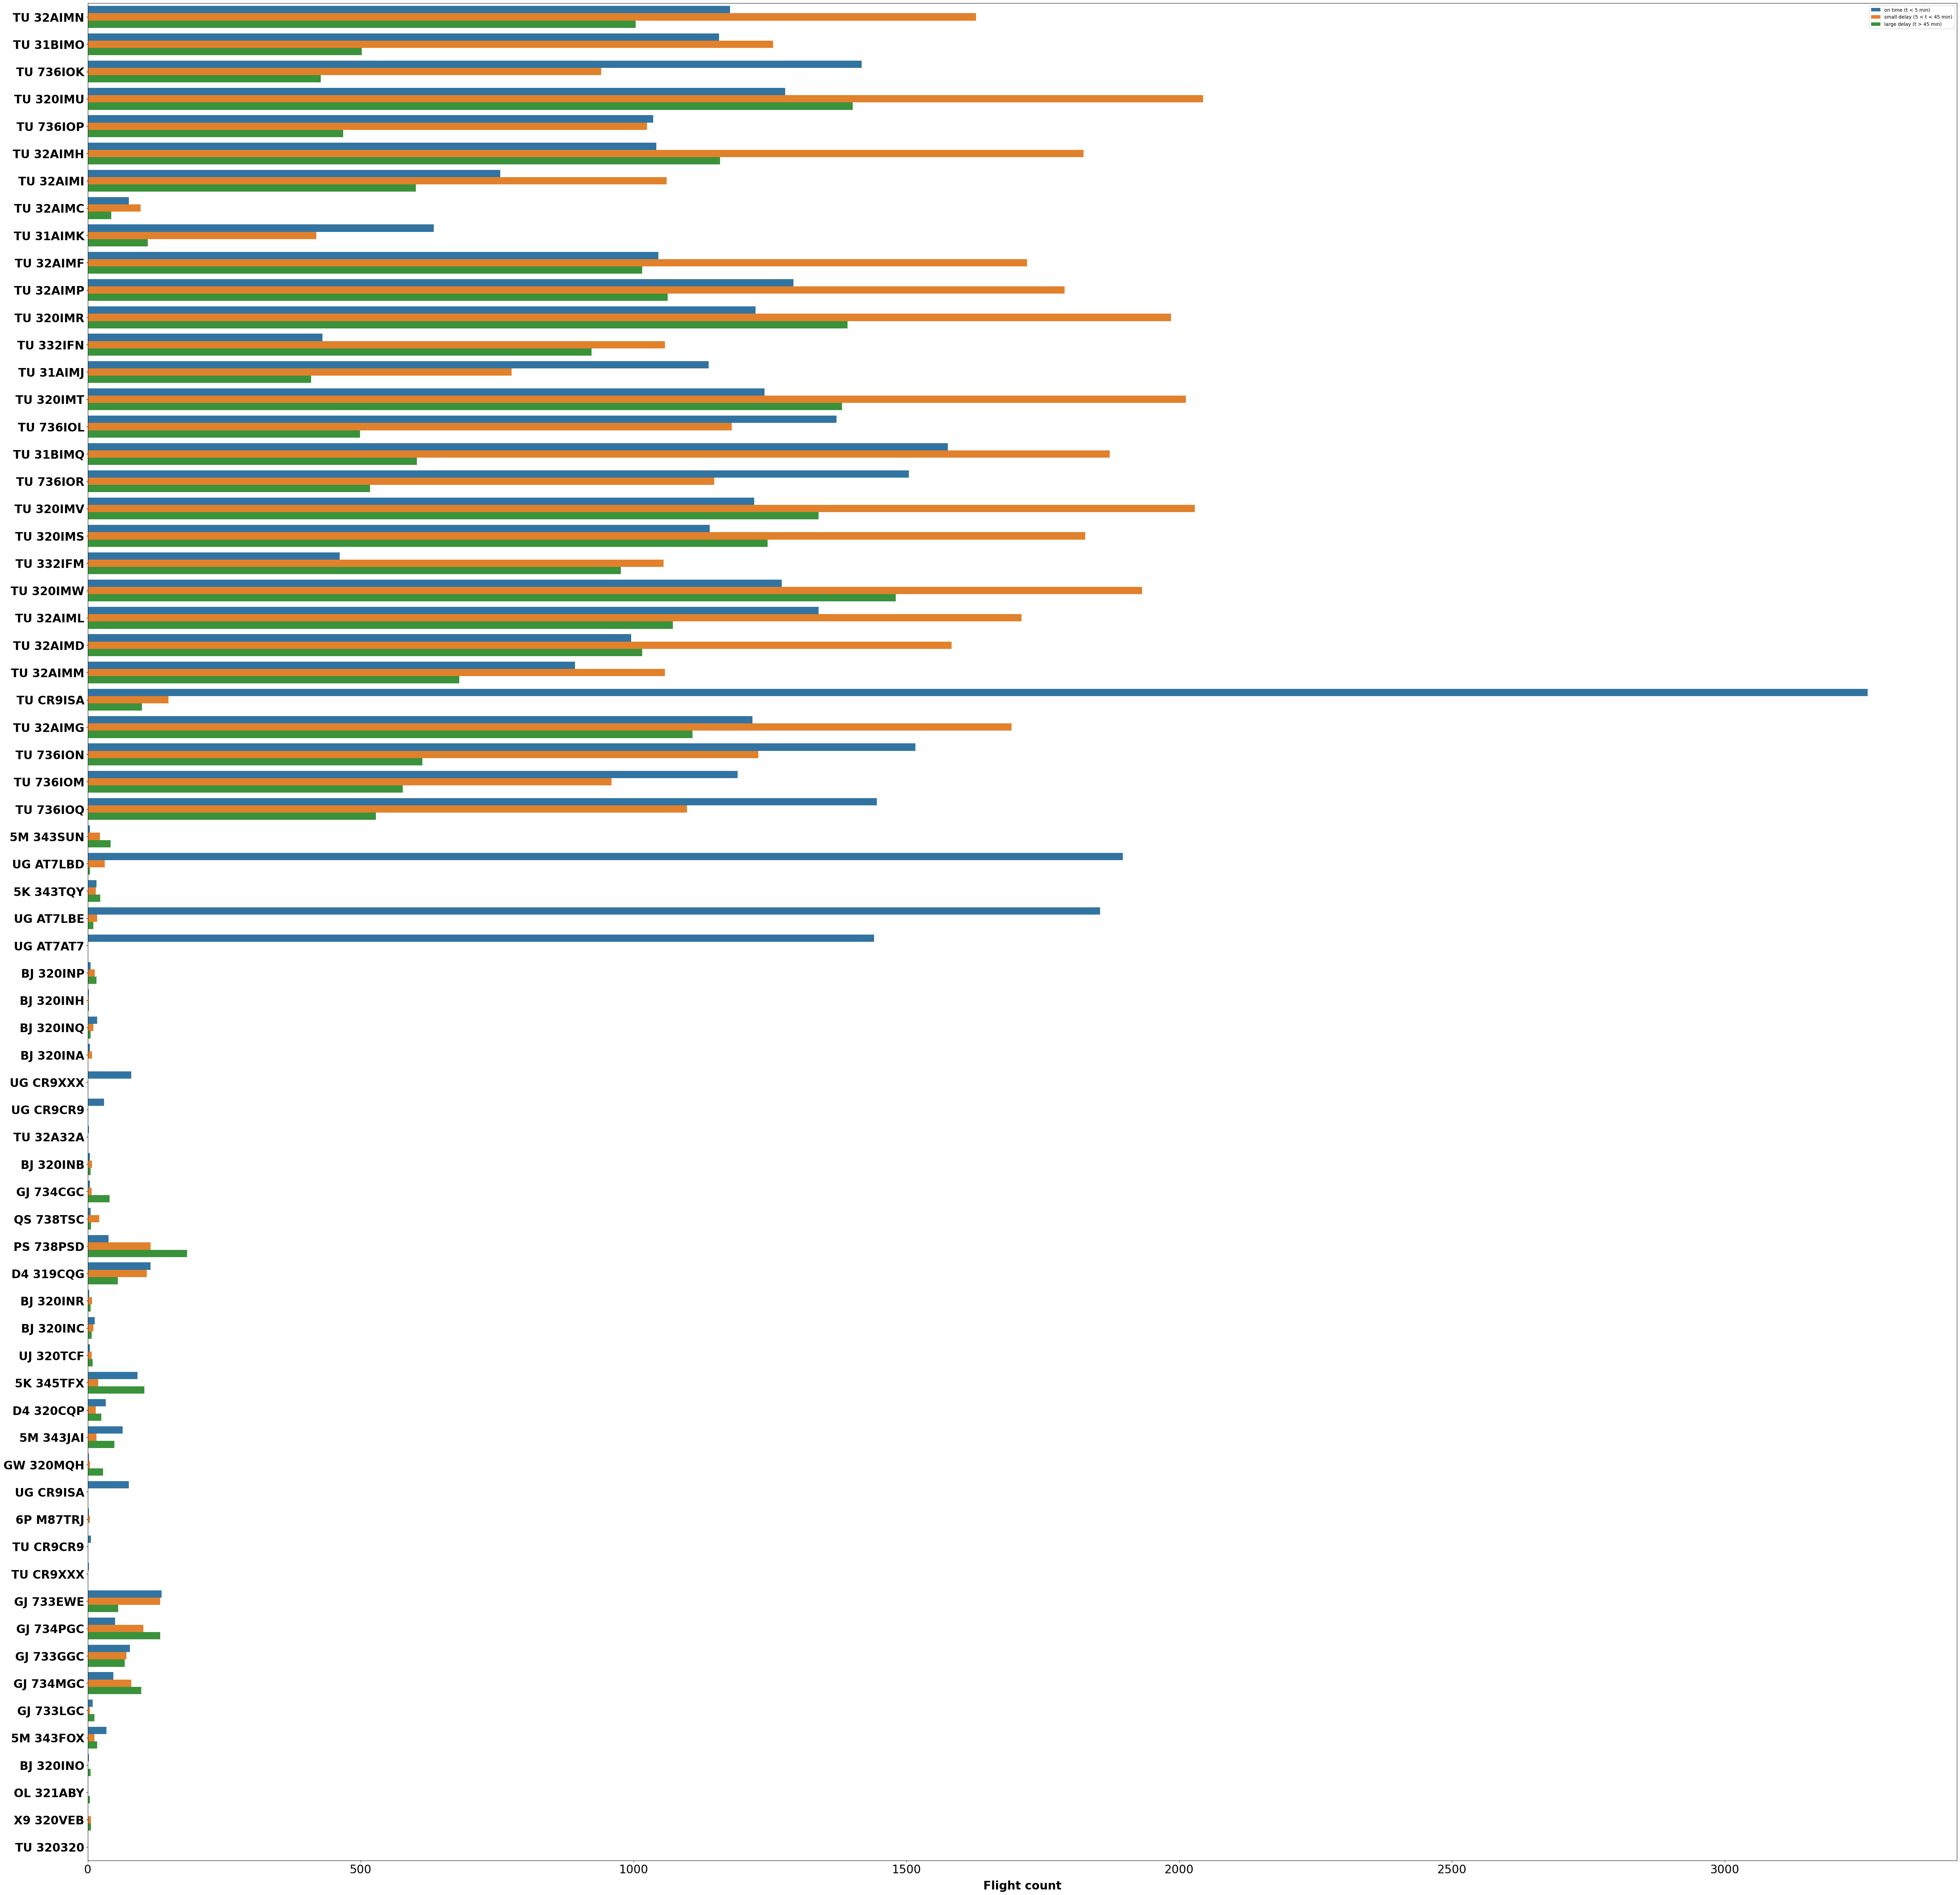

In [75]:
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['delay_level'] = df['target'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(70,70))
ax = sns.countplot(y="ac", hue='delay_level', data=df)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = df['ac'].unique().tolist()
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=24, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=24, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=24, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

**Relationship between the origin airport and delays**

In [76]:
print("Nb of airports: {}".format(df['depstn'].nunique()))

Nb of airports: 132


In [77]:
list_of_airpots = df['depstn'].unique().tolist()
list_of_ac = df['ac'].unique().tolist()
origin_nb = dict()
for carrier in list_of_ac:
    liste_origin_airport = df[df['ac'] == carrier]['depstn'].unique().tolist()
    origin_nb[carrier] = len(liste_origin_airport)


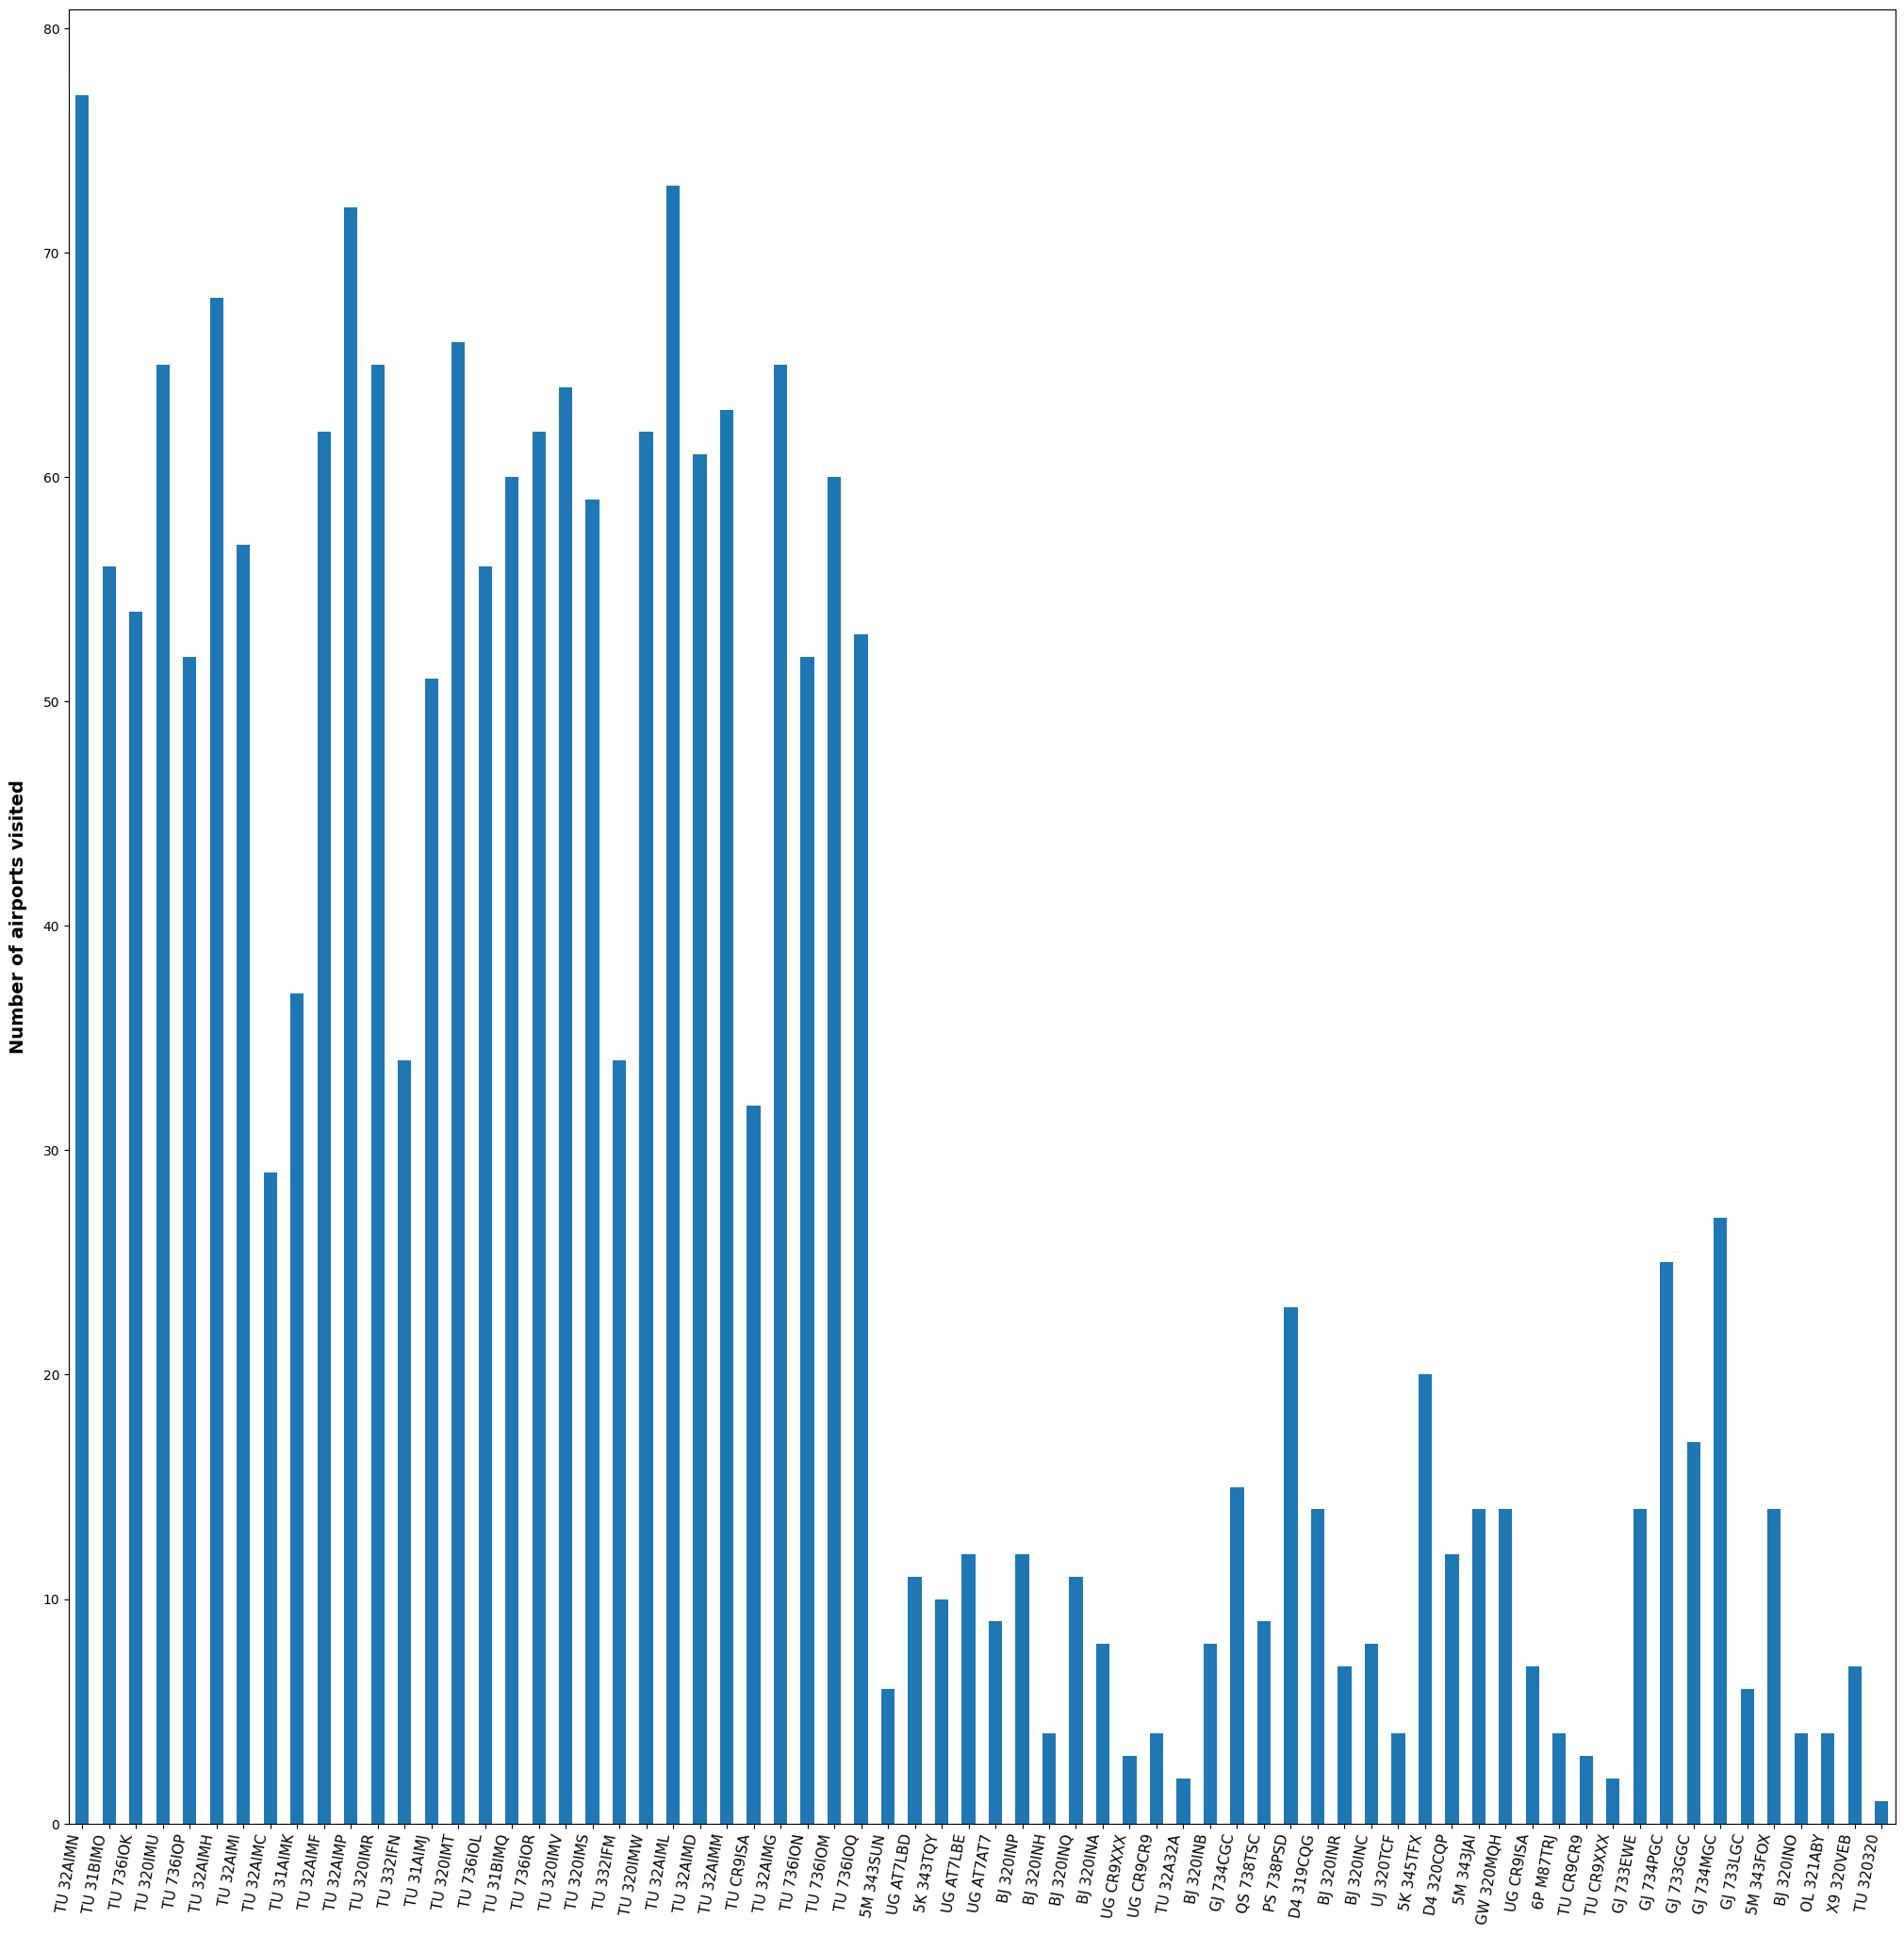

In [78]:
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (25,25))
labels = [x for x in list_of_ac]
ax.set_xticklabels(labels)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

**number of flights per year**

In [79]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target,lat_arr,...,month,Season,weekday,hour,trajectory,trajectory_duration,ac_cat,fltid_cat,trajectory_cat,delay_level
0,train_id_0,2016-01-03,TU 0712,32,119,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,36.851002,...,01,Winter,6,0,CMN-TUN,0 days 02:25:00,46,230,126,2


In [81]:
flights_dict = dict()
ac_group = df.groupby('ac')
for x in list_of_ac:
    df_ac = ac_group.get_group(x)
    flights_dict[x] = df[df['ac'] == x]['year'].value_counts().to_dict()

In [82]:
flights_dict

{'TU 32AIMN': {2018: 1569, 2017: 1264, 2016: 976},
 'TU 31BIMO': {2016: 1265, 2018: 1125, 2017: 525},
 'TU 736IOK': {2018: 1363, 2016: 1316, 2017: 107},
 'TU 320IMU': {2018: 1644, 2017: 1602, 2016: 1478},
 'TU 736IOP': {2017: 1376, 2016: 1065, 2018: 88},
 'TU 32AIMH': {2017: 1575, 2018: 1469, 2016: 982},
 'TU 32AIMI': {2016: 1290, 2018: 999, 2017: 129},
 'TU 32AIMC': {2016: 213, 2017: 1, 2018: 1},
 'TU 31AIMK': {2016: 1081, 2017: 81, 2018: 1},
 'TU 32AIMF': {2018: 1441, 2016: 1322, 2017: 1020},
 'TU 32AIMP': {2017: 1580, 2018: 1412, 2016: 1154},
 'TU 320IMR': {2017: 1643, 2018: 1620, 2016: 1338},
 'TU 332IFN': {2018: 903, 2017: 811, 2016: 697},
 'TU 31AIMJ': {2017: 1212, 2016: 1110, 2018: 2},
 'TU 320IMT': {2017: 1638, 2018: 1554, 2016: 1442},
 'TU 736IOL': {2018: 1198, 2017: 1006, 2016: 847},
 'TU 31BIMQ': {2018: 1490, 2016: 1296, 2017: 1266},
 'TU 736IOR': {2018: 1160, 2016: 1104, 2017: 906},
 'TU 320IMV': {2018: 1610, 2017: 1563, 2016: 1416},
 'TU 320IMS': {2016: 1461, 2017: 1410, 2

In [83]:
# flights_dict
nbr_flights = pd.DataFrame.from_dict(flights_dict, orient='index')
nbr_flights.fillna(0, inplace=True)
# nbr_flights

In [84]:
nbr_flights.columns = ['flights_in_2018', 'flights_in_2017', 'flights_in_2016']

In [85]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,ac,target,lat_arr,...,month,Season,weekday,hour,trajectory,trajectory_duration,ac_cat,fltid_cat,trajectory_cat,delay_level
0,train_id_0,2016-01-03,TU 0712,32,119,2016-01-03 10:30:00,2016-01-03 12:55:00,TU 32AIMN,260.0,36.851002,...,01,Winter,6,0,CMN-TUN,0 days 02:25:00,46,230,126,2


## Splitting data for testing 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
X_train.info()

In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)